In [1]:
import vaex as vx
import vaex.ui.qt
import pandas as pd
import numpy as np
import pylab
import json
import sys
from IPython.display import display
import ipywidgets as widgets
from tqdm import tqdm, tqdm_notebook, tnrange
%matplotlib inline


/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# New York Taxi example
This example was inspired by (https://anaconda.org/jbednar/nyc_taxi/notebook) and (http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/). It demonstrates  visualizing a high volume (non-astromonical) dataset in a Notebook interactively.

# Getting the data
Step 1 is downloading the data

In [4]:
urllist = """https://storage.googleapis.com/tlc-trip-data/2013/green_tripdata_2013-08.csv
https://storage.googleapis.com/tlc-trip-data/2013/green_tripdata_2013-09.csv
https://storage.googleapis.com/tlc-trip-data/2013/green_tripdata_2013-10.csv
https://storage.googleapis.com/tlc-trip-data/2013/green_tripdata_2013-11.csv
https://storage.googleapis.com/tlc-trip-data/2013/green_tripdata_2013-12.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-01.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-02.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-03.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-04.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-05.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-06.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-07.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-08.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-09.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-10.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-11.csv
https://storage.googleapis.com/tlc-trip-data/2014/green_tripdata_2014-12.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-01.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-02.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-03.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-04.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-05.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-06.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-07.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-08.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-09.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-10.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-11.csv
https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-12.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-01.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-02.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-03.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-04.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-05.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-06.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-07.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-08.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-09.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-10.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-11.csv
https://storage.googleapis.com/tlc-trip-data/2009/yellow_tripdata_2009-12.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-01.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-02.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-03.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-04.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-05.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-06.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-07.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-08.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-09.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-10.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-11.csv
https://storage.googleapis.com/tlc-trip-data/2010/yellow_tripdata_2010-12.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-01.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-02.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-03.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-04.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-05.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-06.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-07.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-08.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-09.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-10.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-11.csv
https://storage.googleapis.com/tlc-trip-data/2011/yellow_tripdata_2011-12.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-01.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-02.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-03.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-04.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-05.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-06.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-07.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-08.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-09.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-10.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-11.csv
https://storage.googleapis.com/tlc-trip-data/2012/yellow_tripdata_2012-12.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-01.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-02.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-03.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-04.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-05.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-06.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-07.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-08.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-09.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-10.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-11.csv
https://storage.googleapis.com/tlc-trip-data/2013/yellow_tripdata_2013-12.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-01.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-02.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-03.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-04.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-05.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-06.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-07.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-08.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-09.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-10.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-11.csv
https://storage.googleapis.com/tlc-trip-data/2014/yellow_tripdata_2014-12.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-01.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-02.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-03.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-04.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-05.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-06.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-07.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-08.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-09.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-10.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-11.csv
https://storage.googleapis.com/tlc-trip-data/2015/yellow_tripdata_2015-12.csv""".split("\n")

## Single file
To try out this example, we download a single file

In [ ]:
url = urllist[-12] # 2015-01
!wget -c $url

In [4]:
filename = url.split("/")[-1]

NameError: name 'url' is not defined

In [2]:
filename =  "/Users/maartenbreddels/vaex/data/nytaxi/yellow_tripdata_2015-01.csv"

In [6]:
#Inspect the header of the .csv using head
!head -n3 $filename

In [7]:
# read in the using pandas
date_names = ["tpep_pickup_datetime","tpep_dropoff_datetime"]
df = pd.read_csv(filename, parse_dates=date_names)

In [18]:
# we don't use this 
import vaex as vx
skip = ["store_and_fwd_flag"]
if "store_and_fwd_flag" in df:
    del df["store_and_fwd_flag"]
dataset = vaex.from_pandas(df) # convert the in memory pandas dataframe to a vaex dataset (also in memory)
dataset.add_virtual_column("pickup_hour", "dt_hour(tpep_pickup_datetime)")
dataset.add_virtual_column("dropoff_hour", "dt_hour(tpep_dropoff_datetime)")
dataset.add_virtual_column("pickup_dayofweek", "dt_dayofweek(tpep_pickup_datetime)")
dataset.add_virtual_column("dropoff_dayofweek", "dt_dayofweek(tpep_dropoff_datetime)")

filename_nyt = filename.replace(".csv", ".hdf5")
dataset.export_hdf5(filename_nyt, virtual=True) # and write it out to disk

# Open the dataset

In [3]:
filename_nyt = filename.replace(".csv", ".hdf5")
#nyt = vx.open(filename_nyt)

In [9]:
%%timeit -r 3
nyt = vx.datasets.nyctaxi_yellow_2015.fetch()
lllimits = lonrange, latrange = (-74.0655186833, -73.8048761181), (40.6444424556, 40.9050850209)
nyt("dropoff_longitude", "dropoff_latitude").plot(f=np.log1p, limits=lllimits, cmap="afmhot", size=512)

RuntimeError: wget finished with an error

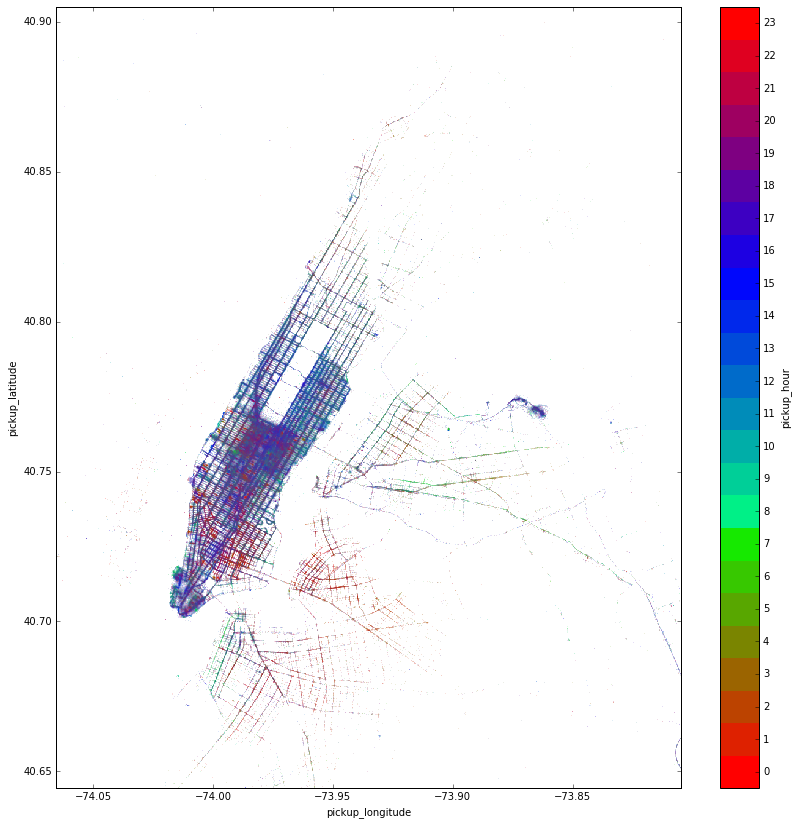

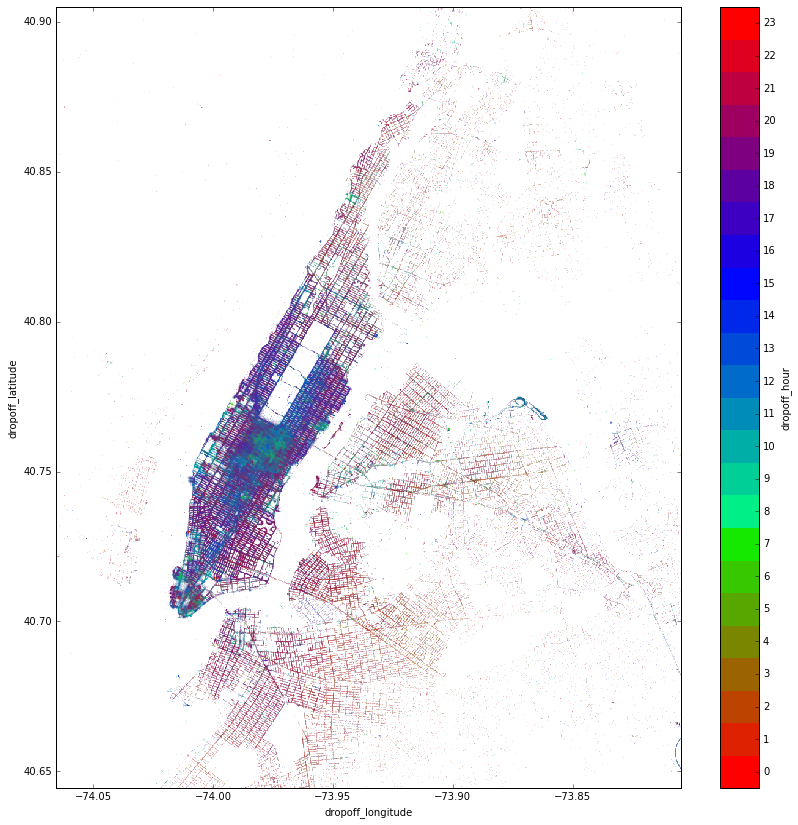

In [365]:
cdict = {'red':   [(0.0,  1.0, 1.0),
                   (0.33, 0.0, 0.0),
                   (0.66, 0.0, 0.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
                   (0.33, 1.0, 1.0),
                   (0.66,  0.0, 0.0),
                   (1.0,  0.0, 0.0)],

         'blue':  [(0.0,  0.0, 0.0),
                   (0.33, 0.0, 0.5),
                   (0.66,  1.0, 1.0),
                   (1.0,  0.0, 0.0)]}

cmap = matplotlib.colors.LinearSegmentedColormap("rgbr", cdict)
pickup = nyt("pickup_longitude", "pickup_latitude")
pylab.figure(figsize=(14,14))
pickup.plot(limits=lllimits, size=1024,f=n,group_by="pickup_hour", group_colors=cmap, group_limits=(0,23,24), group_labels=map(str, range(24)), interpolation="nearest");
pylab.show()

pylab.figure(figsize=(14,14))
dropoff = nyt("dropoff_longitude", "dropoff_latitude")
dropoff.plot(limits=lllimits, size=1024,f=n,group_by="dropoff_hour", group_colors=cmap, group_limits=(0,23,24), group_labels=map(str, range(24)), interpolation="nearest");
pylab.show()


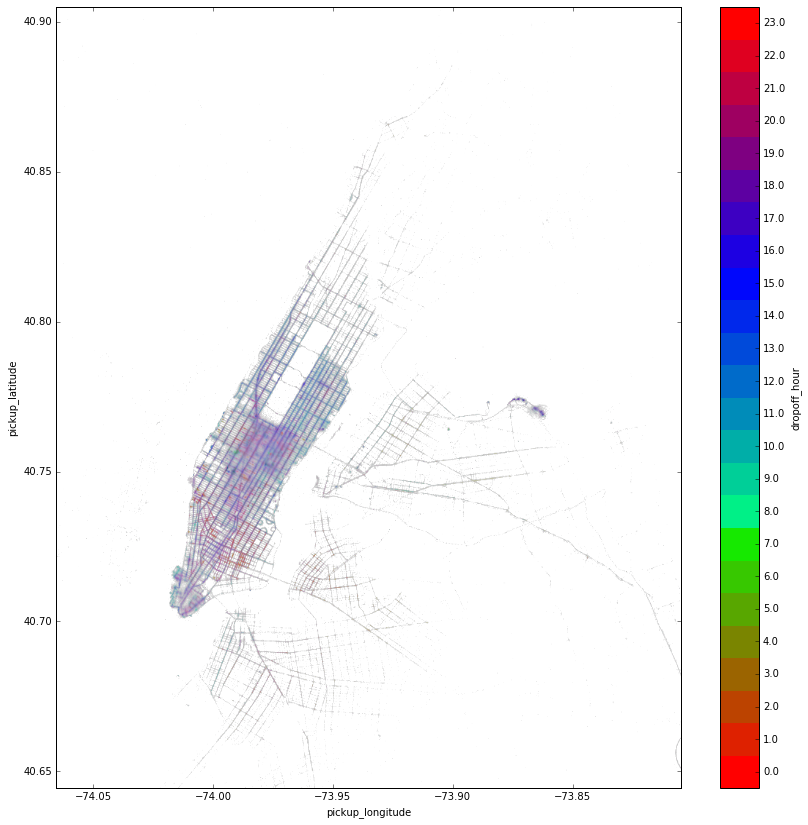

In [362]:
pickup = nyt("pickup_longitude", "pickup_latitude")
pylab.figure(figsize=(14,14))
pickup.plot(limits=lllimits, size=1024,f=n,group_by="dropoff_hour", group_colors=cmap, group_count=24);
pylab.show()
nyt

In [14]:
%load_ext autoreload
%autoreload 2

# Overlayed on a map

In [188]:
import ipyleaflet as ll

In [339]:
last_image_layer = None
def get_limits(map):
    return [[map.west, map.east], [map.south, map.north]]
def overlay_map(map, prefix, alpha=1, **kwargs):
    global last_image_layer
    image_url = nyt(prefix+"_longitude", prefix+"_latitude").rgba_image_url(size=800, f=n,
                                                                            limits=get_limits(map),
                                                                            group_colors=cmap,
                                                                            group_limits=(0,23,24),
                                                                            **kwargs)
    if last_image_layer:
        try:
            map.remove_layer(last_image_layer)
        except:
            pass
    last_image_layer = ImageOverlay(url=image_url, bounds=nymap.bounds) #[[latrange[0], lonrange[0]], [latrange[1], lonrange[1]]])
    map.add_layer(last_image_layer)
lon_center = (lonrange[0] + lonrange[1])/2
lat_center = (latrange[0] + latrange[1])/2
nymap = ll.Map(center=[lat_center, lon_center])
#print m.bounds
#zoom_slider = IntSlider(description='Zoom', min=3, max=17, value=11)
#jslink((zoom_slider, 'value'), (m, 'zoom'))
#area_widget = widgets.Label()
#area_selected_widget = widgets.Label()
#fig_dropoff.width = '300px'
#fig_pickup.width = '300px'
#fig_dropoff.height = '300px'
#fig_pickup.height = '300px'
button_groupby = widgets.ToggleButtons(
    description='View:',
    options=['No groupby', 'pickup hour', 'dropoff hour'],
)
button_opacity = widgets.ToggleButtons(
    description='Opacity:',
    options=['Full Transparant', 'Mixed', 'Opaque'],
)
button_dropoff = widgets.ToggleButtons(
    description='Pickup/Dropoff:',
    options=['pickup', 'dropoff'],
)
button_background = widgets.ToggleButtons(
    description='Background:',
    options=['white', 'black'],
)
#m.width = '400px'
def echo(*args, **kwargs):
    print args, kwargs
    kwargs = {}
    opacity_index = button_opacity.options.index(button_opacity.value)
    kwargs.update([
            {},
            dict(pre_blend=True, background_alpha=0.5),
            dict(pre_blend=True, background_alpha=1.)
        ][opacity_index])
    opacity_index = button_opacity.options.index(button_opacity.value)
    kwargs.update([
            {},
            dict(pre_blend=True, background_alpha=0.5),
            dict(pre_blend=True, background_alpha=1.)
        ][opacity_index])
    groupby_index = button_groupby.options.index(button_groupby.value)
    group_by = [None, "pickup_hour", "dropoff_hour"][groupby_index]
    overlay_map(nymap, prefix=button_dropoff.value, group_by=group_by, background_color=button_background.value, **kwargs)
display(button_groupby, button_opacity, button_dropoff, button_background)
display(nymap)
nymap.observe(echo, "center")
button_dropoff.observe(echo, "value")
button_groupby.observe(echo, "value")
button_opacity.observe(echo, "value")
button_background.observe(echo, "value")

#do(b)

({'owner': <ipyleaflet.leaflet.Map object at 0x1c8da9350>, 'new': [40.77482185003984, -73.93524169921875], 'old': [40.77476373825, -73.93519740069999], 'name': 'center', 'type': 'change'},) {}
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da93d0>, 'new': 'Mixed', 'old': 'Full Transparant', 'name': 'value', 'type': 'change'},) {}
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da9550>, 'new': 'black', 'old': 'white', 'name': 'value', 'type': 'change'},) {}
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da93d0>, 'new': 'Opaque', 'old': 'Mixed', 'name': 'value', 'type': 'change'},) {}
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da93d0>, 'new': 'Mixed', 'old': 'Opaque', 'name': 'value', 'type': 'change'},) {}
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da9550>, 'new': 'white', 'old': 'black', 'name': 'value', 'type': 'change'},) {}
({'o

/Users/maartenbreddels/vaex/src/vaex/python/vaex/dataset.py:566: RuntimeWarning: the frombuffer defaults may change in a future release; for portability, change the call to read:
  frombuffer(mode, size, data, 'raw', mode, 0, 1)
  img = PIL.Image.frombuffer("RGBA", rgba8.shape[:2], rgba8, 'raw') #, "RGBA", 0, -1)


({'owner': <ipyleaflet.leaflet.Map object at 0x1c8da9350>, 'new': [40.748947591479705, -73.97506713867186], 'old': [40.74790720968901, -73.96442413330078], 'name': 'center', 'type': 'change'},) {}
0.2123203125
0.1584984375
0.1518640625
0.1149546875
0.08291875
0.0545390625
0.12185625
0.1723125
0.2057046875
0.2315921875
0.2175390625
0.2300671875
0.2553140625
0.26
0.2599296875
0.2486890625
0.2252453125
0.2582046875
0.3123875
0.3225203125
0.30854375
0.32134375
0.31505
0.0
124.568627451
({'owner': <ipywidgets.widgets.widget_selection.ToggleButtons object at 0x1c8da93d0>, 'new': 'Mixed', 'old': 'Full Transparant', 'name': 'value', 'type': 'change'},) {}
0.2123203125
0.1584984375
0.1518640625
0.1149546875
0.08291875
0.0545390625
0.12185625
0.1723125
0.2057046875
0.2315921875
0.2175390625
0.2300671875
0.2553140625
0.26
0.2599296875
0.2486890625
0.2252453125
0.2582046875
0.3123875
0.3225203125
0.30854375
0.32134375
0.31505
0.0
124.568627451
({'owner': <ipywidgets.widgets.widget_selection.Toggle

# Costs

127.199539185
1.30264282227
0.0848236083984
0.0102996826172
0.00364685058594
0.00157165527344
0.000717163085938
0.000869750976562
0.000946044921875
0.00105285644531
0.001220703125
0.00128173828125
41.2715389186


(<matplotlib.image.AxesImage at 0x234c5a150>,
 <matplotlib.colorbar.Colorbar at 0x224f98290>)

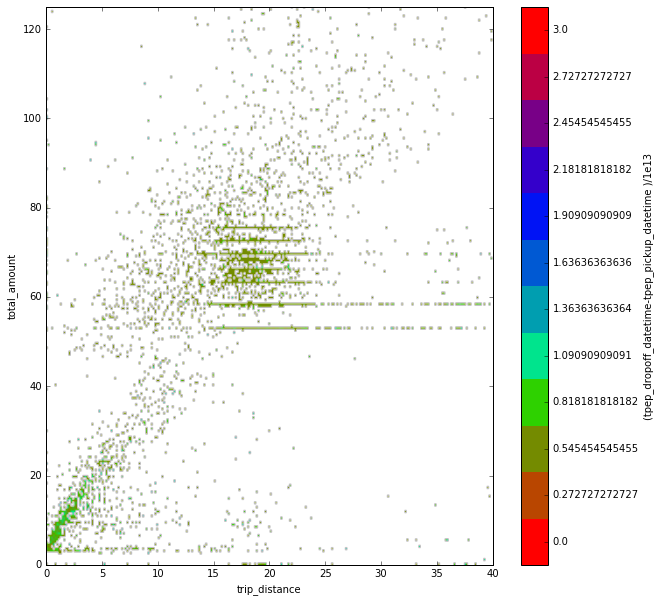

In [461]:
import calendar
pylab.figure(figsize=(10,10))
cost = nyt("trip_distance", "total_amount")
limits_cost = [[0, 40], [0,125]]
weekdays = calendar.day_name #"Mon Tue We"
colors = ["#ff5555"] * 7 + ["green"] * 3 + ["blue"] * 7 + ["green"] * 3 + ["red"] * (24-20)
cost.plot(size=256, limits=limits_cost, f=lambda x: n((x)), group_by="(tpep_dropoff_datetime-tpep_pickup_datetime )/1e13", group_colors=cmap, group_limits=(0,3,12))#, group_labels=weekdays)
#cost.plot(size=512, limits=limits_cost, f=lambda x: n(x)*1.0, group_by="pickup_dayofweek", group_colors=colors, group_limits=(0,6,7), group_labels=weekdays)

# Animated

In [354]:
print np.datetime64(np.max(nyt.data.tpep_pickup_datetime))
print np.datetime64(nyt.data.tpep_pickup_datetime.min())

2015-02-01T00:59:59.000000000+0100
2015-01-01T01:00:00.000000000+0100


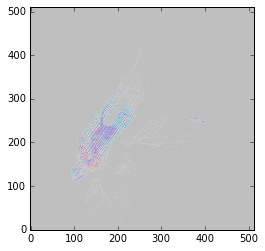

In [336]:
im = nyt("pickup_longitude", "pickup_latitude").\
    rgba_image(size=512, f=n,
               limits=lllimits, group_by="pickup_hour",
               group_colors=colors, group_limits=(0,23,24), 
            pre_blend=True, background_color="white", background_alpha=0.5);
pylab.imshow(im, origin="lower")

In [16]:
lon1 = "(pickup_longitude * pi / 180)"
lon2 = "(dropoff_longitude * pi / 180)"
lat1 = "(pickup_latitude * pi / 180)"
lat2 = "(dropoff_latitude * pi / 180)"
p1 = lat1
p2 = lat2
l1 = lon1
l2 = lon2
# from http://www.movable-type.co.uk/scripts/latlong.html
expr = "arctan2(sin({l2}-{l1}) * cos({p2}), cos({p1})*sin({p2}) - sin({p1})*cos({p2})*cos({l2}-{l1}))"\
.format(**locals())
nyt.add_virtual_column("bearing", expr)
expr

'arctan2(sin((dropoff_longitude * pi / 180)-(pickup_longitude * pi / 180)) * cos((dropoff_latitude * pi / 180)), cos((pickup_latitude * pi / 180))*sin((dropoff_latitude * pi / 180)) - sin((pickup_latitude * pi / 180))*cos((dropoff_latitude * pi / 180))*cos((dropoff_longitude * pi / 180)-(pickup_longitude * pi / 180)))'

In [ ]:
out.update_virtual_meta()

In [ ]:
out.virtual_columns

# Here we 

In [463]:
path_nta = "/Users/maartenbreddels/vaex/data/nytaxi/nta.json"
with open(path_nta) as f:
    nta = json.load(f)

In [ ]:
#for key in [key_test]:
names = set()
for key in regions.keys():
    names.add(key[0])
print names
for name in names:
    out.select_nothing()
    out.selection_undo
    out.mask = None
    first = True
    for key in regions.keys():
        if key[0] == name: #"Brooklyn":
    #    if key[0] == "Bronx":
            region = regions[key]["coordinates"]
            region = np.array(region)
            #assert region.shape[0] == 1
            if len(region.shape) != 1: # some entrys are not of equal length
                #print region.shape
                print key
                for i in range(region.shape[0]):
                    out.select_lasso("pickup_longitude", "pickup_latitude", region[i,:,0], region[i,:,1], mode="or" if not first else "replace")    
                    first = False
    out.selection_favorite_add(name)

In [ ]:
filename = "nyt2015.hdf5"
nyt = vx.open(filename)


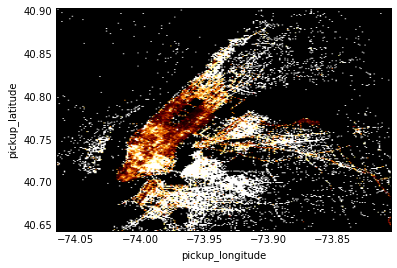

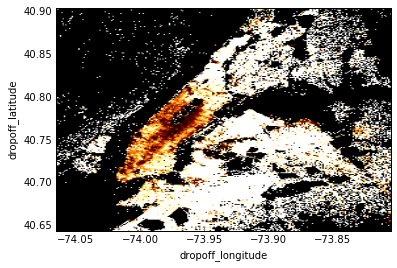

In [7]:
pickup = nyt("pickup_longitude", "pickup_latitude")
dropoff = nyt("dropoff_longitude", "dropoff_latitude")
lonrange, latrange = (-74.0655186833, -73.8048761181), (40.6444424556, 40.9050850209)
#lonrange, latrange = (-74.0346695426, -73.9086410935), (40.6946175761, 40.8206460252)
#lonrange, latrange = (-74.1649075363, -73.8088444894), (40.6178357368, 40.9738987837)
lon_center = (lonrange[0] + lonrange[1])/2
lat_center = (latrange[0] + latrange[1])/2
#nyt.add_virtual_column("pickup_hour", "dt_hour(tpep_pickup_datetime)")
#nyt.add_virtual_column("dropoff_hour", "dt_hour(tpep_dropoff_datetime)")
#h1, h2 = 20, 23
h1, h2 = 0, 4
#h1, h2 = 17, 19
nyt.select("(pickup_hour >= %d) & (pickup_hour < %d)" % (h1, h2))
counts = pickup.histogram(limits=[lonrange, latrange])
counts_night = pickup.selected().histogram(limits=[lonrange, latrange])
ratio_pickup = counts_night/counts
ratio_pickup[counts<1] = 0
pickup.plot(grid=ratio_pickup, limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.2)
pylab.show()

nyt.select("(dropoff_hour >= %d) & (dropoff_hour <= %d)" % (h1, h2))
counts = dropoff.histogram(limits=[lonrange, latrange])
counts_night = dropoff.selected().histogram(limits=[lonrange, latrange])
ratio_dropoff = counts_night/counts
ratio_dropoff[counts<1] = 0
dropoff.plot(grid=ratio_dropoff, limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.2)
ratio= ratio_pickup==ratio_dropoff
pylab.show()
#dropoff.plot(grid=ratio_dropoff, limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.2)

#pylab.imshow(ratio)
#print np.all(ratio)

In [24]:
hour_maps_pickup = []
hour_maps_dropoff = []
total_pickups = pickup.histogram(limits=[lonrange, latrange])
total_dropoffs = pickup.histogram(limits=[lonrange, latrange])
for h in tqdm_notebook(range(24)):
    nyt.select("(pickup_hour == %d)" % (h))
    counts_pickup = pickup.selected().histogram(limits=[lonrange, latrange])
    counts_dropoff = dropoff.selected().histogram(limits=[lonrange, latrange])
    counts_pickup[total_pickups<1] = 0
    counts_dropoff[total_dropoffs<1] = 0

    hour_maps_pickup.append(counts_pickup/total_pickups)
    hour_maps_dropoff.append(counts_dropoff/total_dropoffs)
hour_maps_pickup = np.array(hour_maps_pickup)
hour_maps_dropoff = np.array(hour_maps_dropoff)


In [ ]:
h = 8
pickup_morning = hour_maps_pickup[6:10].sum(axis=0)
dropoff_morning = hour_maps_dropoff[6:10].sum(axis=0)
pickup_evening = hour_maps_pickup[17:20].sum(axis=0)
dropoff_evening = hour_maps_dropoff[17:20].sum(axis=0)
pickup.plot(grid=dropoff_morning * pickup_evening, limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.052)
pylab.show()
pickup.plot(grid=pickup_morning * dropoff_evening, limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.052)
pylab.show()
#h = 18
#pickup.plot(grid=hour_maps_pickup[h], limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.2)
#pylab.show()
#h = 18
#dropoff.plot(grid=hour_maps_dropoff[h], limits=[lonrange, latrange], f=np.log1p, cmap="afmhot", vmin=0, vmax=0.2)
#pylab.show()


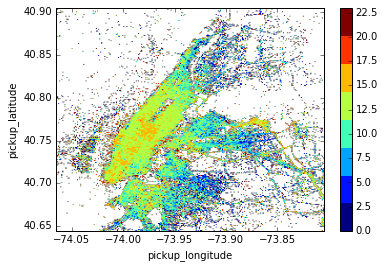

In [23]:
import matplotlib.cm
w = pickup.histogram(limits=lllimits, weight="pickup_hour")#, f=np.log1p)
grid = pickup.histogram(limits=lllimits)#, f=np.log1p)
avg = w/grid
im = pickup.plot(grid=avg, limits=lllimits, weight="pickup_hour", cmap=matplotlib.cm.get_cmap('jet', 8))#, f=np.log1p)
pylab.colorbar(im)

In [21]:
pickup.histogram(lllimits, size=512, group_by="pickup_hour", group_limits=(-0.5, 23.5)).sum()
#g = np.zeros((512, 512, 24))
#limits = list(lonrange) + list(latrange) + [0, 24]
#vaex.vaexfast.histogram3d(nyt.data.pickup_longitude, nyt.data.pickup_latitude, nyt.data.pickup_hour, None, g, *limits)

(512, 512, 25.0)


12259048.0

In [899]:
pickup_hour = nyt("pickup_longitude", "pickup_latitude", "pickup_hour")
#llh_limits = lllimits + [-0.5, ]
#grid = pickup.histogram(limits=lllimits)#, f=np.log1p)
hours = []
for h in range(24):
    nyt.select("(pickup_hour >= (%f)) & (pickup_hour < (%f))" % (-0.5+h, 0.5+h))
    hours.append(pickup.selected().histogram(size=1024, limits=lllimits))
    #hours = [np.sum(pickup_hour.histogram(size=400, limits=[lonrange, latrange, [-0.5+h, 0.5 + h]]), axis=0) for h in range(24)]
def grid_to_rgba(grid, colormap, normalize=False):
    if normalize:
        I = (grid - grid.min()) / grid.ptp()
    else:
        I = grid
    #rgba = (colormap(I) * 255).astype(np.uint8)
    #print I.min(), I.max()
    #rgba = np.zeros(grid.shape + (4,), np.uint8) #cmap(grid * 1.00)
    #rgba[...,3] = (np.clip((I**1.0) * self.state.alpha, 0, 1))
    rgba = (colormap(I) * 255).astype(np.uint8)
    rgba[...,3] = (I * 255)# * opacity + (1-opacity) * (I*0 + 255)
    return rgba
hours_total = np.nansum(hours, axis=0)
#mask = hours_total < 10
hours = [hour for hour in hours]
#for hour in hours:
#    hour[mask] = 0
#hours = [hour*np.nansum(hour) for hour in hours]


In [738]:
print hours_total
print hours_total.shape #hours_total
print hours_total.max(), hours_total.sum()
print [(np.nanmin(g), np.nanmax(g)) for g in hours]
print [(g==1).sum() for g in hours]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(1024, 1024)
26327.0 12259048.0
[(0.0, 602.0), (0.0, 521.0), (0.0, 604.0), (0.0, 748.0), (0.0, 474.0), (0.0, 355.0), (0.0, 2010.0), (0.0, 1551.0), (0.0, 1004.0), (0.0, 1247.0), (0.0, 1524.0), (0.0, 1713.0), (0.0, 1837.0), (0.0, 1845.0), (0.0, 1618.0), (0.0, 1425.0), (0.0, 1461.0), (0.0, 1211.0), (0.0, 1566.0), (0.0, 1435.0), (0.0, 1568.0), (0.0, 1646.0), (0.0, 1411.0), (0.0, 1796.0)]
[15211, 15326, 15419, 14723, 14444, 13228, 13363, 14382, 14378, 13560, 12647, 12393, 12584, 12576, 12457, 12643, 12534, 13197, 13016, 13260, 13218, 13554, 14068, 14666]


In [708]:
colormap(0.)

(0.5, 0.0, 0.0, 1.0)

[ 0.          0.04061453  0.15334067 ...,  0.04061453  0.          0.        ] 0.0 1.0


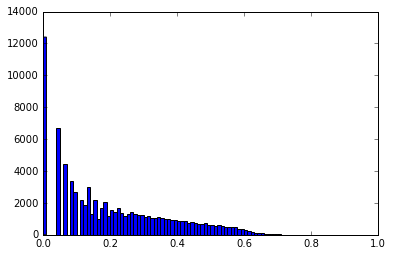

In [877]:
def n_(I):
    #return I
    I = np.log10(I)
    mask = np.isfinite(I)
    I[~mask] = np.nan
    I = I - I[mask].min()
    I /= I[mask].max()
    #print np.nanmin(I), np.nanmax(I)
    return I#*2-0.5 #* 100
#x = hours[1].flatten()
#x = x[x != 0]
#x = np.log10(x+1e-7)
#print x, x.max()
#pylab.hist(x, bins=100);
#x = n_(hours[1]).flatten()
x = a * 1
x = x[a>0]
x = n(x.flatten())
x = x[np.isfinite(x)]
print x[np.isfinite(x)], np.nanmin(x), np.nanmax(x)
pylab.hist(x, bins=100);
pylab.show()

(4, 1024, 1024) 255.0


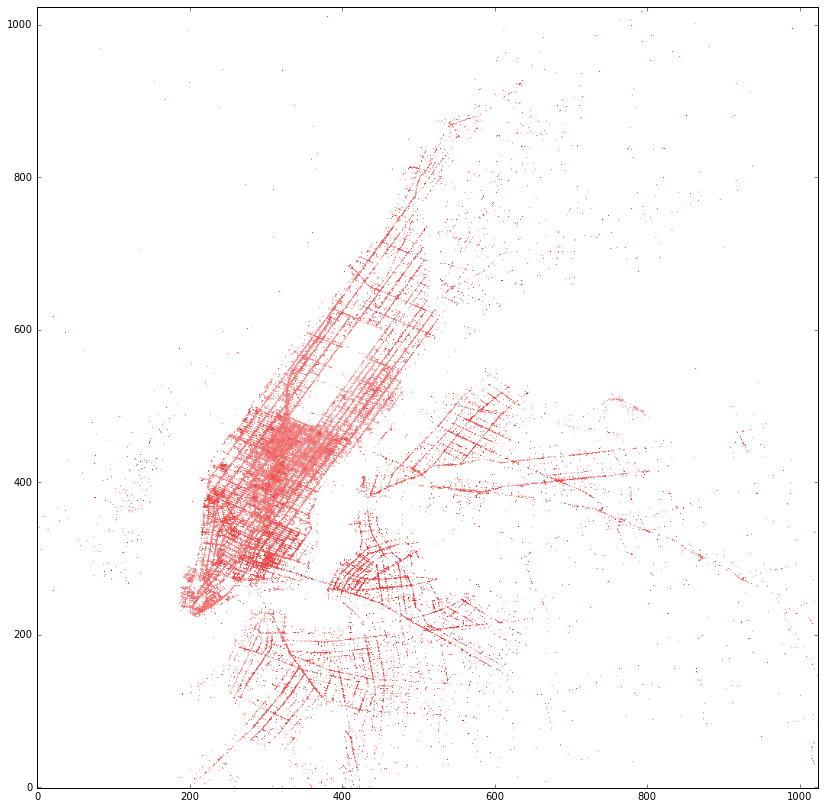

In [710]:
pylab.figure(figsize=(14,14))
k = 1
def n(I):
    #I = np.log10(I)
    I = I**(1./6)#np.sqrt(I)
    mask = np.isfinite(I)
    I[~mask] = np.nan
    I = I - np.nanmin(I[mask])
    I /= np.nanmax(I[mask])
    #print np.nanmin(I), np.nanmax(I)
    return I#*1-0.5#*1.5-0.5 #* 100

grid=hours[k]
I = (n(grid).T*255*1.*np.array(colormap(k/12.)).reshape((4,1,1)))
print I.shape, np.nanmax(I)
#I[3] = (I[3]/255.)**10 * 255
I = np.clip(I, 0, 255).astype(np.uint8)
I[3,hours_total.T==0] = 0
pylab.imshow(rgb(I.T[...,0:4]), origin="lower")

In [76]:
colors = ["#FF0000","#FF3F00","#FF7F00","#FFBF00","#FFFF00","#BFFF00","#7FFF00","#3FFF00",
          "#00FF00","#00FF3F","#00FF7F","#00FFBF","#00FFFF","#00BFFF","#007FFF","#003FFF",
          "#0000FF","#3F00FF","#7F00FF","#BF00FF","#FF00FF","#FF00BF","#FF007F","#FF003F",]
colors = [matplotlib.colors.colorConverter.to_rgba(k) for k in colors]
colormap = matplotlib.colors.ListedColormap(["#ff0000", "#00ff00", "#0000ff"])
colormap 

(-3, 0, 9)
(9, 500, 500)
(500, 500, 4)


(<matplotlib.image.AxesImage at 0x1c1ce6c10>,
 <matplotlib.colorbar.Colorbar at 0x1c1ce6950>)

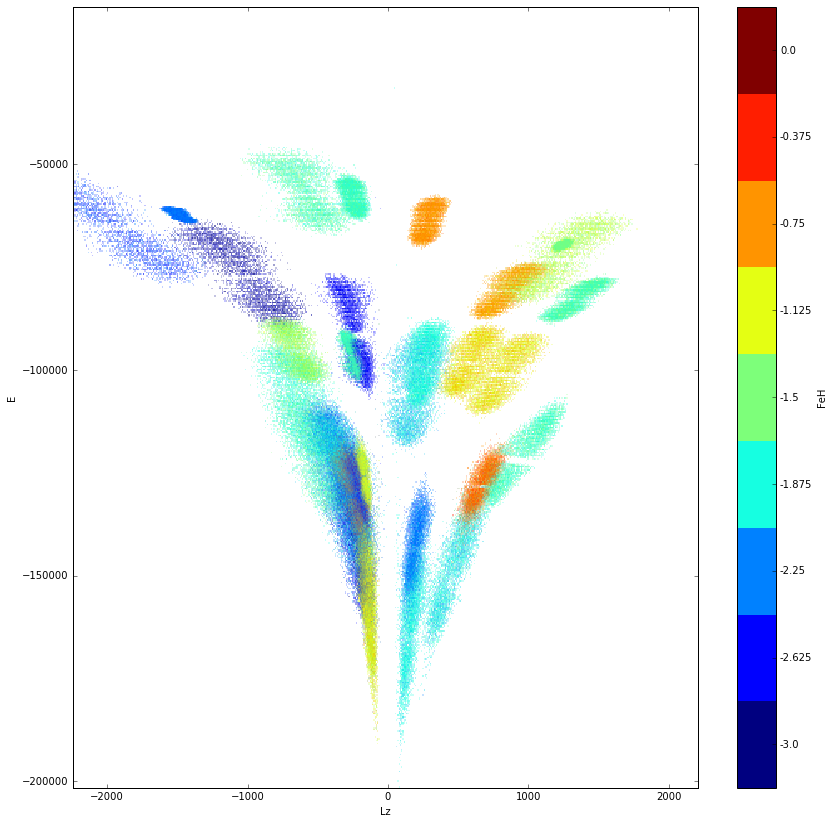

In [156]:
ds = vx.example()
xy = ds("Lz", "E")
limits = xy.limits_sigma(sigmas=3,square=False)
#Lz_limits = 
#print 
colormap= matplotlib.cm.get_cmap('jet')
pylab.figure(figsize=(14,14))
xy.plot(size=500, f=lambda x: n(x)*1., limits=limits, group_by="FeH", group_limits=(-3, 0, 9), group_colors=colormap, interpolation="nearest")

(0, 23, 24)
(24, 512, 512)
(512, 512, 4)


(<matplotlib.image.AxesImage at 0x1cc69c7d0>,
 <matplotlib.colorbar.Colorbar at 0x1cc69c510>)

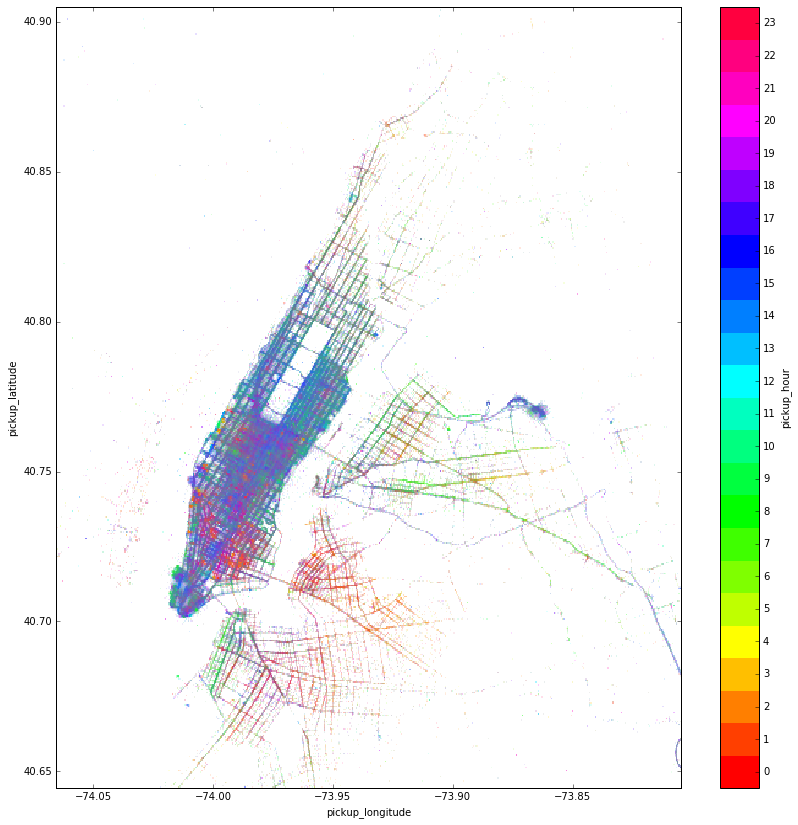

In [158]:
pylab.figure(figsize=(14,14))
pickup.plot(limits=lllimits, size=512,f=n,group_by="pickup_hour", group_colors=colors, group_limits=(0,23,24), group_labels=map(str, range(24)), interpolation="nearest")

In [26]:
#3colormap= matplotlib.cm.get_cmap('jet_r', 24)
#colormap= matplotlib.cm.get_cmap('brg', 24)
#rgba_list = [grid_to_rgba(grid*5, colormap=colormap) for grid in hours]
def n(I):
    #return I
    #return I*2# * 1.5
    #I = I ** 0.3
    #return I#**0.3
    #return np.log10(I)/2#/5
    #print np.nanmin(I), np.nanmax(I)
    #print np.nanmin(I), np.nanmax(I)
    mask = np.isfinite(I) & (I > 0)
    I = np.log10(I)
    I[~mask] = np.nan
    I = I - np.nanmin(I[mask])
    I /= np.nanmax(I[mask])
    #print np.nanmin(I), np.nanmax(I)
    return (I*2) #*2-0.5)*1.5#*5-0.1#*2-0.15#*1-0.5#*1.5-0.5 #* 100
grid3d = np.array([k.T for k in hours]).T
a = hours_total * 1.
mask = a>0
print a[mask].min()
a = a - a[mask].min()
a[~mask] = 0
a = a / a[mask].max()
print a.min(), a.max()
grid3d = (grid3d)
#rgba = grid3d.dot([np.array(colormap(k/24.)) for k in range(24)])
#colors = [np.array(colormap(k/24.)) for k in range(24)]
rgba = grid3d.dot(colors)
rgba[...,3] = n(a)*1.#(a**0.3) * 5
rgba[hours_total == 0,3] = 0.
#rgba[hours_total == 0,3] = 0.
mask = a>0
for i in range(3):
    rgba[...,i] /= hours_total
    rgba[~mask,i] = 1.
print "not finite", (~np.isfinite(a)).sum(), (~np.isfinite(rgba[...,0])).sum()
#rgba = n(rgba)
for i in range(4):
    #x = (rgba[...,i])
    if i == 3:
        x = (rgba[...,i])
    else:
        x = (rgba[mask,i])
    x = x[x>0]
    x = x[np.isfinite(x)]
    #print x[np.isfinite(x)], np.nanmin(x), np.nanmax(x)
    pylab.hist(x, bins=100);
#pylab.show() 
print np.nanmax(rgba[...,0]), rgba[...,0].max()
#rgba.max()
#rgba[...,3] *= 5
rgba= np.clip(rgba, 0, 1)
rgba8 = (rgba*255).astype(np.uint8)
pylab.figure(figsize=(14,14))
def rgb(rgba):
    rgba= np.clip(rgba, 0, 1)
    #rgba = (rgba.astype(np.float) / 255)
    a = rgba[...,3]
    rgb = rgba[...,0:3]*a + (rgba[...,0:3] * 0 + 1) * (1-a)
    rgb= np.clip(rgb, 0, 1)
    return (rgb * 255).astype(np.uint8)

pylab.imshow(rgba8, origin="lower")
#pylab.imshow(rgb(rgba), origin="lower")

NameError: name 'hours' is not defined

(1024, 1024)
(1024, 1024)


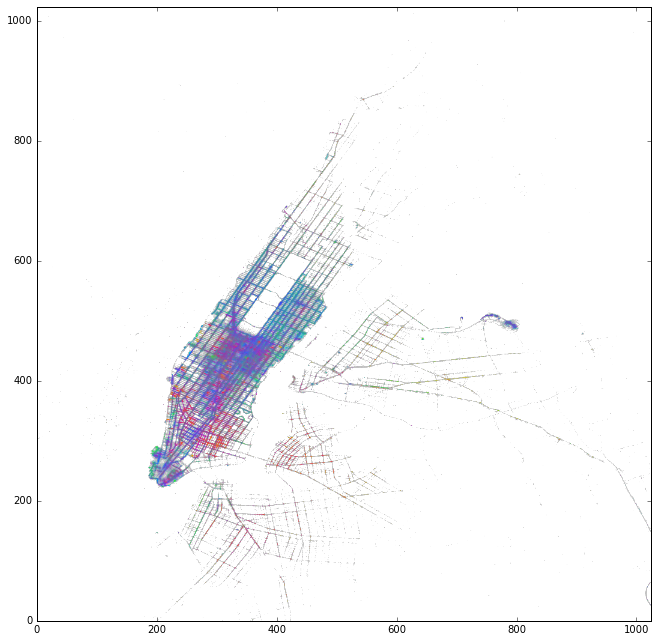

In [989]:
import datashader.transfer_functions as tf
def rgb(rgba):
    rgba= np.clip(rgba, 0, 1)
    #rgba = (rgba.astype(np.float) / 255)
    a = rgba[...,3].T
    a[~np.isfinite(a)] = 0
    a= np.clip(a, 0, 1)
    c = rgba[...,0:3].T
    white = np.ones_like(c)
    print c.shape, c.T.shape, a.shape
    f = 1 - a
    
    #a * c#  * a
    rgb = (c + white * (1-a))#*a #c.rgba[...,0:3] + a * (rgba[...,0:3] * 0 + 1)# * (1-a)
    print np.nanmax(rgb)
    print rgb.shape
    rgb= np.clip(rgb, 0, 1)
    return (rgb.T * 255).astype(np.uint8)
pylab.figure(figsize=(11,11))
rgba8 = (np.clip(rgba, 0, 1) * 255).astype(np.uint8).view(np.uint32)
imdata = rgba8.reshape(rgba[...,0].shape)
print imdata.shape
im = tf.Image(imdata)
#im = rgb(rgba)
#bands = []
#for i in range(3):
im_spread = tf.dynspread(im, threshold=0.1, max_px=4)
#    bands.append(im_spread.data)
#im = np.dstack(bands)
print im.shape
rgba8 = im_spread.data.view(np.uint8).reshape(rgba.shape)
pylab.imshow(rgba8, origin="lower")
#pylab.imshow(rgba8, origin="lower")


In [973]:
rgba[...,3].min()

nan

(4, 1024, 1024)
4985.65466882 61648.933192
255


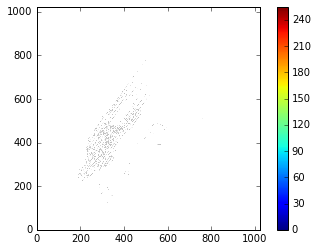

In [965]:
rgba_list = [1200 *2* (np.nansum(grid)/ np.nansum(hours_total) * n__(grid).T*255*2.5*np.array(colormap(k/24.)).reshape((4,1,1))) for grid, k in zip(hours, range(24))]
#rgba_list = [(np.log10(grid.T*100000)/6*1*255*np.array(colormap(k/23.)).reshape((4,1,1))) for grid, k in zip(hours, range(24))]
rgba = np.sum(rgba_list, axis=0)/24.
print rgba.shape
rgba[3,:,:] = rgba[3,:,:]# * 2
print np.nanmin(rgba[3,:,:]), np.nanmax(rgba[3,:,:])
#rgba[3,rgba[0]==np.inf] =0 
rgba = np.clip(rgba, 0, 255).astype(np.uint8)
#rgba[...,hours_total.T == 0] = 255
#rgba[3,...] = hours_total.T/hours_total.max() * 255#
#rgba[3,...] = n(hours_total.T)*150#* 0 + 255
rgba[3,hours_total.T == 0] = 0
#im = pylab.imshow(rgba_list[23].T, origin="lower")
#im = pylab.imshow(rgb(rgba.T[:,:,0:4]), origin="lower")
im = pylab.imshow((rgba.T[:,:,0:4]), origin="lower")
print rgba.max()
pylab.colorbar(im)

In [530]:
hours_total.shape
#rgba.shape

(512, 512)

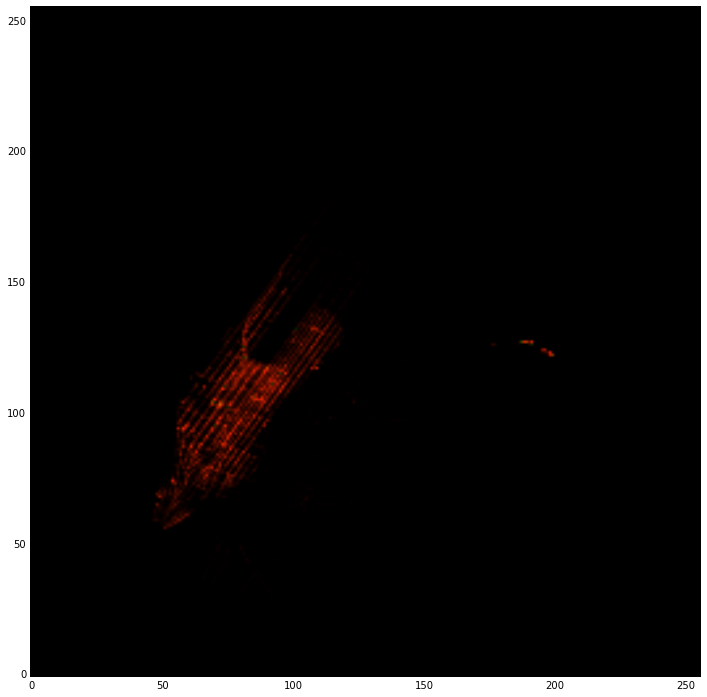

In [215]:
pylab.figure(figsize=(12,12))
im = pylab.imshow(rgba_list[20].T[:,:,0:3], origin="lower")


[[[ 0.5]]

 [[ 0. ]]

 [[ 0. ]]

 [[ 1. ]]]
1.0


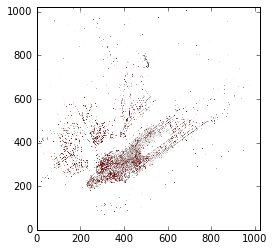

In [150]:
c = np.array(colormap(k/23.)).reshape((4,1,1))
print c
(c * hours[1]).shape
g = hours[k] * 10
#g = np.log10(hours[k]*10000)/4
g = np.clip(g, 0, 1)
print np.nanmax(g)
im = pylab.imshow(((c * g * 255)).astype(np.uint8).T, origin="lower")

In [109]:
rgba_list[0].T.shape

(1024, 1024, 4)

In [21]:
len(rgba_list)

24

In [160]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker, LayerGroup,
    GeoJSON,
    DrawControl
)

from ipywidgets import jslink, IntSlider

from traitlets import link

In [173]:
#limits = [[m._west, m._east], [m._south, m._north]]
#limits = lonrange, latrange
def calculate_grid(subspace, limits, size=256):
    #ss.plot(limits=limits, f=np.log1p)
    grid = subspace.histogram(limits, size=256)
    return grid

def create_image_url(grid, opacity=0):
    import matplotlib.cm
    cmap = matplotlib.cm.cmap_d["afmhot"]
    I = (grid - grid.min()) / grid.ptp()
    #print I.min(), I.max()
    rgba = np.zeros(grid.shape + (4,), np.uint8) #cmap(grid * 1.00)
    #rgba[...,3] = (np.clip((I**1.0) * self.state.alpha, 0, 1))
    rgba = (cmap(I) * 255).astype(np.uint8)
    #print rgba.shape
    rgba[...,3] = (I * 255) * opacity + (1-opacity) * (I*0 + 255)
    #rgba[...,0] = I * 255
    import PIL.Image
    img = PIL.Image.frombuffer("RGBA", grid.shape, rgba, 'raw') #, "RGBA", 0, -1)
    import StringIO
    f = StringIO.StringIO()
    img.save(f, "png")
    from base64 import b64encode
    imgurl = "data:image/png;base64," + b64encode(f.getvalue()) + ""
    return imgurl
#from IPython.display import HTML
#HTML("<img src='" + imgurl + "'/>")

In [ ]:
last_layer = None


In [181]:
from ipywidgets import Button, Checkbox, ToggleButton
import warnings
last_layer = None
def get_limits():
    return [[m.west, m.east], [m.south, m.north]]
def do(button):
    global last_layer
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        limits = get_limits()
        #subspace = nyt("pickup_longitude", "pickup_latitude")
        #grid = subspace.histogram(limits, size=512)
        if 0:
            nyt.select("(pickup_hour > 0) & (pickup_hour < 4)")
            counts = pickup.histogram(limits=limits)
            counts_night = pickup.selected().histogram(limits=limits)
            ratio_pickup = counts_night/counts
            ratio_pickup[counts<1] = 0
            grid = ratio_pickup
        else:
            nyt.select("(dropoff_hour > 0) & (dropoff_hour < 4)")
            counts = dropoff.histogram(limits=limits)
            counts_night = dropoff.selected().histogram(limits=limits)
            ratio_dropoff = counts_night/counts
            ratio_dropoff[counts<1] = 0
            grid = counts
            
        imgurl = create_image_url(np.log1p(grid), opacity=1.0)
        if last_layer:
            try:
                m.remove_layer(last_layer)
            except:
                pass
        image_layer = ImageOverlay(url=imgurl, bounds=m.bounds) #[[latrange[0], lonrange[0]], [latrange[1], lonrange[1]]])
        m.add_layer(image_layer)
        last_layer = image_layer
        print "ok"

b = Button(description="redraw")
b.on_click(do)
c = ToggleButton(description="transparant")
c.observe(do)

In [183]:
m = Map(center=[lat_center, lon_center])
print m.bounds
zoom_slider = IntSlider(description='Zoom', min=3, max=17, value=11)
jslink((zoom_slider, 'value'), (m, 'zoom'))
area_widget = widgets.Label()
area_selected_widget = widgets.Label()
fig_dropoff.width = '300px'
fig_pickup.width = '300px'
fig_dropoff.height = '300px'
fig_pickup.height = '300px'
#m.width = '400px'
display(m,b,c, area_widget, area_selected_widget)
do(b)

[(0.0, 0.0), (0.0, 0.0)]
ok


In [ ]:
for fig in [fig_dropoff, fig_pickup]:
    ax = fig
    ax.scale.min = 0
    ax.scale.max = 2.5/24

In [480]:
#print(lon_center, lat_center)
m = Map(center=[lat_center, lon_center])
print m.bounds
zoom_slider = IntSlider(description='Zoom', min=3, max=17, value=11)
jslink((zoom_slider, 'value'), (m, 'zoom'))
area_widget = widgets.Label()
area_selected_widget = widgets.Label()
#fig_dropoff.width = '300px'
#fig_pickup.width = '300px'
#fig_dropoff.height = '300px'
#fig_pickup.height = '300px'
m.width = ''
#display(widgets.Box([fig_dropoff, fig_pickup]), m,b,c, area_widget, area_selected_widget)
from ipywidgets import *
items_layout = Layout(flex='1 1 auto',
                      width='auto')#, margin="0px 0px 0px 0px;")     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column', 
                    align_items='stretch', 
                    border='solid',
                    width='30%', height="500")
map_layout = Layout(display='flex',
                    flex_flow='column', 
                    align_items='stretch', 
                    border='solid',
                    width='stretch', height="400")
fig_dropoff.layout = None#items_layout
fig_pickup.layout = None#items_layout
m.layout = map_layout
m.layers = tuple(list(m.layers) + regions_layer.layers)
figbox = VBox([fig_dropoff, fig_pickup], layout=box_layout)
control_box = HBox([b,c])
#box = HBox([VBox([fig_dropoff, fig_pickup]), m])
box = HBox([VBox([VBox([area_widget, area_selected_widget]), m, control_box]), figbox])
display(box)
#fig_dropoff.title.title = "Dropoff"
#display(widgets.VBox([m, widgets.HBox([fig_dropoff, fig_pickup])]),b,c, area_widget, area_selected_widget)
#def f(data):
    #print args
#    do(b)
#m.observe(f, names="center")


[(0.0, 0.0), (0.0, 0.0)]


/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWar

NameError: global name 'hours_data' is not defined

/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWar

NameError: global name 'hours_data' is not defined

/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWar

NameError: global name 'hours_data' is not defined

/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/maartenbreddels/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWar

In [478]:
bar_pickup.y = [hours_pickup.values()[0], hours_pickup.values()[0], ]
bar_dropoff.y = [hours_pickup.values()[0], hours_pickup.values()[0], ]

In [481]:
fig_pickup.title = "Pickup hours"
fig_dropoff.title = "Dropoff hours"
xax = fig_dropoff.axes[0]
xax.tick_values = range(0, 24, 2)
fig_pickup.axes[0].tick_values = range(0, 24, 2)

In [479]:
regions_layer = LayerGroup()
hour_data = {}
for feature in nta["features"][:]:
    def bla(*args):
        print "bla", args
    def hover_handler(event=None, id=None, properties=None, feature=feature):
        #print event, id, properties
        key = feature["properties"]["BoroName"], feature["properties"]["NTAName"]
        area_widget.value = feature["properties"]["BoroName"] + " - " + feature["properties"]["NTAName"]
        #sys.stdout.write("ok: \r") # + properties['geounit'])
        #sys.stdout.flush()
        data_pickup = hours_pickup[key]/sum(hours_pickup[key])
        data_dropoff = hours_dropoff[key]/sum(hours_dropoff[key])
        if bar_pickup.y == []:
            bar_pickup.y = [data_pickup*0, data_pickup]
            bar_dropoff.y = [data_dropoff*0, data_dropoff]
        else:
            bar_pickup.y = [bar_pickup.y[0], data_pickup]
            bar_dropoff.y = [bar_dropoff.y[0], data_dropoff]
    def click_handler(event=None, id=None, properties=None, feature=feature):
        key = feature["properties"]["BoroName"], feature["properties"]["NTAName"]
        area_selected_widget.value = feature["properties"]["BoroName"] + " - " + feature["properties"]["NTAName"]
        data_pickup = hours_pickup[key]/sum(hours_pickup[key])
        data_dropoff = hours_dropoff[key]/sum(hours_dropoff[key])
        if bar_pickup.y == []:
            bar_pickup.y = [data_pickup, data_pickup*0]
            bar_dropoff.y = [data_dropoff, data_dropoff*0]
        else:
            bar_pickup.y = [data_pickup, bar_pickup.y[1]]
            bar_dropoff.y = [data_dropoff, bar_dropoff.y[1]]
        print hours_data[key]

    if feature["geometry"]["type"] == "Polygon":
            feature["geometry"]["type"] = "MultiPolygon"
            feature["geometry"]["coordinates"] = [feature["geometry"]["coordinates"]]
    feature["properties"].update({u'style': {u'opacity': 0.5, u'noClip': False, u'weight': 4, u'color': u'#f06eaa',
                                                   u'lineCap': None, u'stroke': True, u'smoothFactor': 1, u'dashArray': None, 
                                                   u'fillOpacity': 0.2, u'clickable': True, u'lineJoin': None, u'fill': True,
                                                   u'fillColor': 'green'}})
    new_poly = GeoJSON(data=feature, hover_style={'fillColor': 'red'})
    new_poly.on_hover(hover_handler)
    new_poly.on_click(click_handler)
    regions_layer.layers.append(new_poly)
    continue
    data_r = feature
    geo = GeoJSON(data=data_r)
    def select(feature=feature):
        select_feature(feature)
    geo.on_click(select)
    m.add_layer(geo)

In [ ]:
m.add_layer(regions_layer)

In [ ]:
def echo(*args):
    print args
m.on_msg(echo)

In [ ]:
m.clear_layers()

In [ ]:
for layer in [m.layers[-1]]:
    m.remove_layer(layer)

In [ ]:
#new_poly = GeoJSON(data=dc.last_draw)
zoom_slider


In [ ]:
dc = DrawControl()

def handle_draw(self, action, geo_json):
    print(action)
    print(geo_json)

dc.on_draw(handle_draw)
m.add_control(dc)

In [ ]:
dc.last_draw

In [ ]:
data= dc.last_draw

In [ ]:
data["properties"].update({u'abbrev': u'Alb.',
  u'abbrev_len': 4,
  u'adm0_a3': u'ALB',
  u'adm0_a3_is': u'ALB',
  u'adm0_a3_un': -99,
  u'adm0_a3_us': u'ALB',
  u'adm0_a3_wb': -99,
  u'adm0_dif': 0,
  u'admin': u'Albania',
  u'brk_a3': u'ALB',
  u'brk_diff': 0,
  u'brk_group': None,
  u'brk_name': u'Albania',
  u'continent': u'Europe',
  u'economy': u'6. Developing region',
  u'featurecla': u'Admin-0 country',
  u'fips_10': None,
  u'formal_en': u'Republic of Albania',
  u'formal_fr': None,
  u'gdp_md_est': 21810,
  u'gdp_year': -99,
  u'geou_dif': 0,
  u'geounit': u'Albania',
  u'gu_a3': u'ALB',
  u'homepart': 1,
  u'income_grp': u'4. Lower middle income',
  u'iso_a2': u'AL',
  u'iso_a3': u'ALB',
  u'iso_n3': u'008',
  u'labelrank': 6,
  u'lastcensus': 2001,
  u'level': 2,
  u'long_len': 7,
  u'mapcolor13': 6,
  u'mapcolor7': 1,
  u'mapcolor8': 4,
  u'mapcolor9': 1,
  u'name': u'Albania',
  u'name_alt': None,
  u'name_len': 7,
  u'name_long': u'Albania',
  u'name_sort': u'Albania',
  u'note_adm0': None,
  u'note_brk': None,
  u'pop_est': 3639453,
  u'pop_year': -99,
  u'postal': u'AL',
  u'region_un': u'Europe',
  u'region_wb': u'Europe & Central Asia',
  u'scalerank': 1,
  u'sov_a3': u'ALB',
  u'sovereignt': u'Albania',
  'style': {'color': 'grey',
   'fillColor': 'grey',
   'fillOpacity': 0.5,
   'weight': 1},
  u'su_a3': u'ALB',
  u'su_dif': 0,
  u'subregion': u'Southern Europe',
  u'subunit': u'Albania',
  u'tiny': -99,
  u'type': u'Sovereign country',
  u'un_a3': u'008',
  u'wb_a2': u'AL',
  u'wb_a3': u'ALB',
  u'wikipedia': -99,
  u'woe_id': -99})
new_poly = GeoJSON(data=data, hover_style={'fillColor': 'red'})
data

In [ ]:
new_layer

In [ ]:
#m.remove_layer(new_poly)
def bla(*args):
    print "bla", args
def hover_handler(event=None, id=None, properties=None):
    sys.stdout.write("ok: \r") # + properties['geounit'])
    sys.stdout.flush()
new_poly.on_hover(hover_handler)
new_layer = m.add_layer(new_poly)


In [ ]:
#data_r 

In [ ]:
!pip install tqdm


In [467]:
from collections import *
boroughs = defaultdict(list)
for k in nta["features"]:
    borough_name = k["properties"]["BoroName"]
    boroughs[borough_name].append(k["properties"]["NTAName"])

def select_area(borough, area, type="pickup"):
    first = True
    for feature in nta["features"]:
        if borough == feature["properties"]["BoroName"] and (area == "all" or area == feature["properties"]["NTAName"]):
            region = feature["geometry"]["coordinates"][0]
            region = np.array(region)
            #assert region.shape[0] == 1
            if len(region.shape) == 1: # some entrys are not of equal length
                print "malformed area"
            else:
                #print region
                for i in range(region.shape[0]):
                    nyt.select_lasso(type+"_longitude", type+"_latitude", region[i,:,0], region[i,:,1], mode="or" if not first else "replace")    
                    first = False
from tqdm import tqdm, tqdm_notebook, tnrange
hours_pickup = {}
hours_dropoff = {}
for feature in tqdm_notebook(nta["features"]):
    borough = feature["properties"]["BoroName"]
    area = feature["properties"]["NTAName"]
    select_area(borough, area, type="pickup")
    ss = nyt("dt_hour(tpep_pickup_datetime)")
    hours = ss.selected().histogram(size=24, limits=[[-0.5, 23.5]])
    hours_pickup[(borough, area)] = hours

    select_area(borough, area, type="dropoff")
    ss = nyt("dt_hour(tpep_dropoff_datetime)")
    hours = ss.selected().histogram(size=24, limits=[[-0.5, 23.5]])
    hours_dropoff[(borough, area)] = hours
    

malformed area
malformed area
malformed area
malformed area
malformed area
malformed area
malformed area
malformed area



In [ ]:
#regions = {(k["properties"]["BoroName"], k["properties"]["NTAName"]):(k["geometry"]) for k in nta["features"]}
from collections import defaultdict
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def do(borough, area):
    nyt.select_nothing()
    nyt.mask = None
    print borough, area
    first = True
    subspace = nyt("pickup_longitude", "pickup_latitude")
    select_area(borough, area)
    subspace.plot(limits=get_limits(), f=np.log1p, cmap="afmhot", alpha=0.4)
    if nyt.has_selection():
        subspace.selected().plot(limits=get_limits(), f=np.log1p, cmap="afmhot", alpha=0.4)
    pylab.show()
    #nyt.data.tpep_pickup_datetime
    #nty("dt_hour(tpep_pickup_datetime)").histogram(size=24, limits=[-0,5, 6.5])
    ss = nyt("dt_hour(tpep_pickup_datetime)")
    hours = ss.histogram(size=24, limits=[[-0.5, 23.5]])
    if nyt.has_selection():
        hours_sel = ss.selected().histogram(size=24, limits=[[-0.5, 23.5]])
    else:
        hours_sel = hours * 0
    print np.sum(hours), len(nyt), np.sum(hours_sel), nyt.length(selection=True)
    bar.y = [hours/np.sum(hours), hours_sel/np.sum(hours_sel)]
    
borough_widget = widgets.Dropdown(options=sorted(boroughs.keys()), description="Borough")
area_widget = widgets.Dropdown(options=[], description="Area")
def update_area(*args):
    names = ["all"] + list(sorted(boroughs[borough_widget.value]))
    area_widget.options = names+ [area_widget.value]
    area_widget.value = names[0]
    area_widget.options = names
borough_widget.observe(update_area, 'value')
update_area(borough_widget.value)
wi = interactive(do, borough=borough_widget, area=area_widget)
wi

In [164]:
import bqplot as bq

In [170]:

def make_fig():
    x_data = np.arange(24)

    x_ord = bq.OrdinalScale()
    y_sc = bq.LinearScale()

    bar = bq.Bars(x=x_data, y=[], scales={'x': x_ord, 'y': y_sc},
                  type='grouped',display_legend=False, labels=['All', 'Selection'])
    #line = bq.Lines(x=x_data, y=np.random.randn(size), scales={'x': x_ord, 'y': y_sc},
     #               stroke_width=3, colors=['red'], display_legend=True, labels=['Line chart'])

    ax_x = bq.Axis(scale=x_ord)
    ax_y = bq.Axis(scale=y_sc, orientation='vertical', tick_format='0.2f', grid_lines='solid')

    fig = bq.Figure(marks=[bar], axes=[ax_x, ax_y], min_width=100, min_height=100)
    fig.animation_duration = 1000
    return fig, bar
#display(fig)
fig_dropoff, bar_dropoff = make_fig()
fig_pickup, bar_pickup = make_fig()

In [171]:
display(fig_dropoff)

In [ ]:
bar_dropoff